# Customer Churn Prediction


#### 1. Introduction

You have been provided a SQLite database file named 'telecom.db' that contains 
fictitious data from a fictitious Internet Service Provider (ISP) called Linebreeze. 

The database has three tables:
  1) demographics
  2) usage
  3) calls

Your goal is to:
  - Connect to the SQLite database using Python
  - **Explore the tables (using SQL)**
  - Perform some basic data exploration and visualizations
  - Analyze the relationship between various predictors and churn
  - **Outline** how you would build, train, and evaluate a model to predict 
    monthly customer churn 
  - Provide a business recommendation based on your findings

**We are not looking for a model**. Instead, 
we want to see how you think about:
  - SQL querying & data cleaning
  - Exploratory Data Analysis (EDA)
  - Data preparation for predictive modeling
  - Model evaluation metrics
  - Recommendation or next steps for the business

Feel free to use libraries such as pandas, numpy, seaborn, matplotlib or any others you think are necessary. Please keep the notebook organized and well-commented.

#### 2. Setup & Database Connection

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the SQLite database
DB_NAME = "telecom.db"  # ensure 'telecom.db' is in the same folder as this notebook or specify the full path
conn = sqlite3.connect(DB_NAME)

# Create a cursor to run SQL statements
cursor = conn.cursor()

# Example: get the list of tables in the SQLite database
tables_query = """
SELECT name 
FROM sqlite_master 
WHERE type='table';
"""
table_names = pd.read_sql(tables_query, conn)
print("Tables in the database:")
print(table_names)

# Example: read entire table into pandas DataFrame using SQL
demo_df = pd.read_sql("SELECT * FROM demographics LIMIT 5;", conn)
print("\nSample rows from 'demographics' table:")
display(demo_df)

Tables in the database:
           name
0  demographics
1         usage
2         calls

Sample rows from 'demographics' table:


,customer_id,month,age,income,churn,churn_date
0,cust_00001,2024-01-01,40,99327.0,0,None
1,cust_00001,2024-02-01,40,99327.0,0,None
2,cust_00001,2024-03-01,40,99327.0,0,None
3,cust_00002,2024-01-01,44,112351.0,0,None
4,cust_00002,2024-02-01,44,112351.0,0,None


#### 3. Data Exploration / EDA

1) Use SQL (through Python) to explore each table: 
   - demographics 
   - usage
   - calls

2) Explore the columns, data types, and a sample of records to understand each dataset. **Store any queries you use to examine the table as a string**. The goal is to understand how you approach and analyze unfamiliar data. Once this is complete, feel free to load it into a pandas dataframe and move on to step 3.

3) Provide visualizations (histograms, bar charts, etc) to summarize the data. 
   - For instance, distribution of age, income metrics,...

Provide your analysis in the cells below.

In [2]:
#Get a list of columns in each table,
demographics_columns_query = "SELECT * FROM demographics where 1=0;"
usage_columns_query = "SELECT * FROM usage where 1=0;"
calls_columns_query = "SELECT * FROM calls where 1=0;"

print("Columns in Demographics", )
demo_col_df = pd.read_sql(demographics_columns_query, conn)
display(demo_col_df)
print("Columns in Usage")
use_col_df = pd.read_sql(usage_columns_query, conn)
display(use_col_df)
print("Columns in Calls")
call_col_df = pd.read_sql(calls_columns_query, conn)
display(call_col_df)

# Explore the schema of each table - [cid, name, type, notnull, dflt_value, pk]
demographics_schema_query = "PRAGMA table_info(demographics);"
usage_schema_query = "PRAGMA table_info(usage);"
calls_schema_query = "PRAGMA table_info(calls);"

cursor.execute(demographics_schema_query)
demographics_schema = cursor.fetchall()
print("Demographics Table Schema:\n", demographics_schema)

cursor.execute(usage_schema_query)
usage_schema = cursor.fetchall()
print("Usage Table Schema:\n", usage_schema)

cursor.execute(calls_schema_query)
calls_schema = cursor.fetchall()
print("Calls Table Schema:\n", calls_schema)

#Retrieve a Sample of Records
# Query to fetch sample records
demographics_sample_query = "SELECT * FROM demographics LIMIT 5;"
usage_sample_query = "SELECT * FROM usage LIMIT 5;"
calls_sample_query = "SELECT * FROM calls LIMIT 5;"

# Execute the queries and store the results into pandas dataframes
demographics_sample_df = pd.read_sql(demographics_sample_query, conn)
print("\nDemographics Sample Data:\n", demographics_sample_df)
print(demographics_sample_df.columns)
usage_sample_df = pd.read_sql(usage_sample_query, conn)
print("\nUsage Sample Data:\n",usage_sample_df)
print(usage_sample_df.columns)
calls_sample_df = pd.read_sql(calls_sample_query, conn)
print("\n Calls Sample Data:\n",calls_sample_df)
print(calls_sample_df.columns)


Columns in Demographics


,customer_id,month,age,income,churn,churn_date


Columns in Usage


,customer_id,usage_date,data_in_gb,data_out_gb,plan_speed_mbps,service_type


Columns in Calls


,customer_id,call_date,call_type,call_duration,agent_id


Demographics Table Schema:
 [(0, 'customer_id', 'TEXT', 0, None, 0), (1, 'month', 'TEXT', 0, None, 0), (2, 'age', 'INTEGER', 0, None, 0), (3, 'income', 'REAL', 0, None, 0), (4, 'churn', 'INTEGER', 0, None, 0), (5, 'churn_date', 'TEXT', 0, None, 0)]
Usage Table Schema:
 [(0, 'customer_id', 'TEXT', 0, None, 0), (1, 'usage_date', 'TEXT', 0, None, 0), (2, 'data_in_gb', 'REAL', 0, None, 0), (3, 'data_out_gb', 'REAL', 0, None, 0), (4, 'plan_speed_mbps', 'INTEGER', 0, None, 0), (5, 'service_type', 'TEXT', 0, None, 0)]
Calls Table Schema:
 [(0, 'customer_id', 'TEXT', 0, None, 0), (1, 'call_date', 'TEXT', 0, None, 0), (2, 'call_type', 'TEXT', 0, None, 0), (3, 'call_duration', 'INTEGER', 0, None, 0), (4, 'agent_id', 'TEXT', 0, None, 0)]

Demographics Sample Data:
   customer_id       month  age    income  churn churn_date
0  cust_00001  2024-01-01   40   99327.0      0       None
1  cust_00001  2024-02-01   40   99327.0      0       None
2  cust_00001  2024-03-01   40   99327.0      0       None

In [3]:

#Retrieve all records of tables
# Query to fetch sample records
demographics_query = "SELECT * FROM demographics;"
usage_query = "SELECT * FROM usage;"
calls_query = "SELECT * FROM calls;"

# Execute the queries and store the results into pandas dataframes
demographics_df = pd.read_sql(demographics_query, conn)
print(demographics_df.describe(),"\n")
print(demographics_df.info(),"\n")

usage_df = pd.read_sql(usage_query, conn)
print(usage_df.describe(),"\n")
print(usage_df.info(),"\n")

calls_df = pd.read_sql(calls_query, conn)
print(calls_df.describe(),"\n")
print(calls_df.info(),"\n")


                age         income         churn
count  14292.000000   14292.000000  14292.000000
mean      50.238455   80465.930521      0.050308
std       16.066045   19949.491632      0.218587
min       20.000000   20000.000000      0.000000
25%       39.000000   66909.000000      0.000000
50%       50.000000   80301.500000      0.000000
75%       62.000000   93937.250000      0.000000
max       85.000000  153422.000000      1.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14292 entries, 0 to 14291
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  14292 non-null  object 
 1   month        14292 non-null  object 
 2   age          14292 non-null  int64  
 3   income       14292 non-null  float64
 4   churn        14292 non-null  int64  
 5   churn_date   1449 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 670.1+ KB
None 

          data_in_gb    data_out_gb  plan_

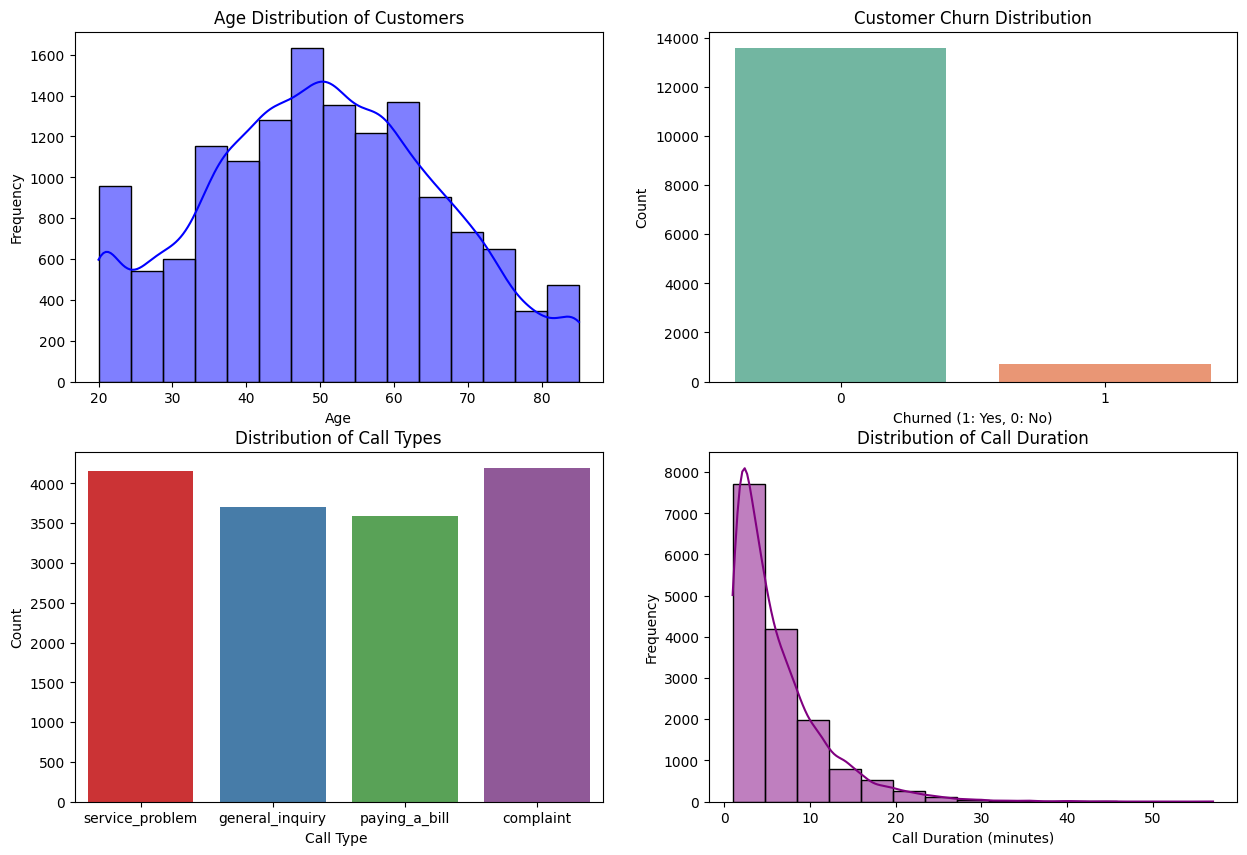

In [4]:
#Summarizing data through visualization 
plt.figure(figsize=(15,10))

#Distribution of Age (Demographics Table) - histogram
plt.subplot(2, 2, 1)
#Dividing the data into equal-sized bins
sns.histplot(demographics_df['age'], bins=15, kde=True, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')

#Distribution of Churn (Demographics Table)-countplot
plt.subplot(2, 2, 2)
sns.countplot(x='churn', data=demographics_df, palette='Set2')
plt.title('Customer Churn Distribution')
plt.xlabel('Churned (1: Yes, 0: No)')
plt.ylabel('Count')



#Proportion of Call Types (Calls Table)
plt.subplot(2, 2, 3)
sns.countplot(x='call_type', data=calls_df, palette='Set1')
plt.title('Distribution of Call Types')
plt.xlabel('Call Type ')
plt.ylabel('Count')


#Call Duration (Calls Table)
plt.subplot(2, 2, 4)
sns.histplot(calls_df['call_duration'], bins=15, kde=True, color='purple')
plt.title('Distribution of Call Duration')
plt.xlabel('Call Duration (minutes)')
plt.ylabel('Frequency')

plt.show()

#### 4. Churn Analysis & Feature Engineering

1. The target variable is 'churn' (0 or 1) in the demographics table. 1 = the customer churned in that month and 0 = the customer has continued their service with Linebreeze. There is also a churn_date column that represents when they churned.
2. Investigate which variables might be predictive of churn. Using any method of your choice!
   For instance, you could look at:
     - Average age of those who churned vs those who didn't
     - Number of a specific type of calls and their relation to the target variable
     - Usage amounts
     
**TIP:** The usage table and calls table are **not** summarized per month.
  - Every account has daily usage data in the usage table.
  - An account can have many calls in a month and there is only ever one row per call event.

You should aggregate these two tables so it is one row per customer per month and then join both of these to the demographics dataset to create a merged table to analyze churn. This is an opportunity to do some feature engineering to create new features that might help predict churn on the month. Your table should look something like this.

| customer_id |   month    | feature_1 | feature_2 | feature_n | churn |
|-------------|------------|-----------|-----------|-----------|-------|
| cust_00055  | 2024-01-01 |    325.84 |    359.15 |      36.0 |     1 |
| cust_00056  | 2024-01-01 |    124.48 |     99.10 |       5.0 |     0 |
| cust_00056  | 2024-02-01 |    103.36 |    108.28 |       4.0 |     0 |
| cust_00056  | 2024-03-01 |    100.35 |    107.20 |       0.0 |     0 |
| cust_00057  | 2024-01-01 |    569.19 |    560.44 |      10.0 |     0 |
| cust_00057  | 2024-02-01 |    504.93 |    487.90 |      21.0 |     1 |
| cust_00058  | 2024-01-01 |    686.09 |    594.37 |      10.0 |     0 |
| cust_00058  | 2024-02-01 |    640.32 |    646.21 |       0.0 |     0 |
| cust_00058  | 2024-03-01 |    616.37 |    546.46 |       0.0 |     0 |
| cust_00059  | 2024-01-01 |    114.38 |    129.96 |       0.0 |     0 |
| cust_00059  | 2024-02-01 |    125.02 |    115.22 |       0.0 |     1 |

3. Explore how these features differ (on average) between churners and non-churners.
4. Discuss any interesting findings or patterns that might explain churn behavior.

**It is important to note that this is fake data, even though a new feature might not be predictive you can still create it and discuss why it might be predictive in the real world.**

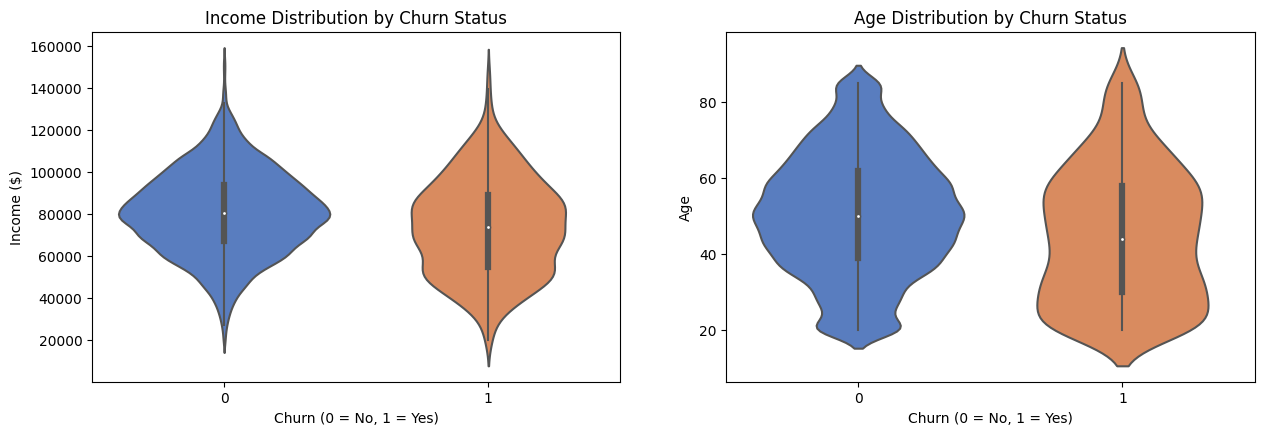

In [5]:
#mutual distributions
plt.figure(figsize=(15,10))

#Income Distribution by Customer Churn
plt.subplot(2, 2, 1)
sns.violinplot(x=demographics_df['churn'], y=demographics_df['income'], palette="muted")

plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Income ($)')
plt.title('Income Distribution by Churn Status')

#Age Distribution by Customer Churn
plt.subplot(2, 2, 2)
sns.violinplot(x=demographics_df['churn'], y=demographics_df['age'], palette="muted")

plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.title('Age Distribution by Churn Status')

plt.show()

In [6]:
#Monthly churn by user(Y/N)
monthly_user_churn_query = """SELECT customer_id, 
    strftime('%Y-%m', month) AS year_month,
    MAX(churn) AS churn_in_month,
    age, income
FROM demographics
GROUP BY customer_id,year_month
ORDER BY customer_id,year_month;"""
monthly_user_churn_df = pd.read_sql(monthly_user_churn_query, conn)


#Monthly data usage by customer 
monthly_user_usage_query = """SELECT customer_id, 
    strftime('%Y-%m', usage_date) AS year_month,
    SUM(data_in_gb + data_out_gb) AS total_monthly_usage_gb,
    plan_speed_mbps, service_type
FROM usage
GROUP BY customer_id,year_month
ORDER BY customer_id,year_month;"""
monthly_user_usage_df = pd.read_sql(monthly_user_usage_query, conn)


#Monthly calls by customer 
monthly_user_call_query= """SELECT customer_id, 
    strftime('%Y-%m', call_date) AS year_month,
    SUM(call_duration) AS total_monthly_call_duration,
    COUNT(*) as total_monthly_call
FROM calls
GROUP BY customer_id,year_month
ORDER BY customer_id,year_month;"""
monthly_user_call_df = pd.read_sql(monthly_user_call_query, conn)


#to have access to all call_types a user has made
monthly_user_call_type_query= """SELECT customer_id, 
    strftime('%Y-%m', call_date) AS year_month,
    call_type
FROM calls
ORDER BY customer_id,year_month;"""
user_call_type_df = pd.read_sql(monthly_user_call_type_query, conn)


#merge all tables (user monthly usage/call/churn)
merged_df = pd.merge(monthly_user_churn_df, monthly_user_usage_df, on=['customer_id', 'year_month'])
merged_df = pd.merge(merged_df, monthly_user_call_df, on=['customer_id', 'year_month'])

display(merged_df)

merged_df2 = pd.merge(monthly_user_churn_df, user_call_type_df, on=['customer_id', 'year_month'], how='right')

display(merged_df2)

# Calculate correlation matrix
#corr_matrix = merged_df[['age', 'total_monthly_usage_gb', 'total_monthly_call_duration', 'income','churn']].corr()
# Plot the heatmap
#plt.figure(figsize=(8,6))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
#plt.title('Correlation Heatmap')
#plt.show()

,customer_id,year_month,churn_in_month,age,income,total_monthly_usage_gb,plan_speed_mbps,service_type,total_monthly_call_duration,total_monthly_call
0,cust_00001,2024-02,0,40,99327.0,1113.61,1000,coax,10,2
1,cust_00001,2024-03,0,40,99327.0,977.13,1000,coax,3,1
2,cust_00002,2024-01,0,44,112351.0,1476.22,1000,coax,2,1
3,cust_00002,2024-02,0,44,112351.0,1110.05,1000,coax,4,1
4,cust_00002,2024-03,0,44,112351.0,1496.50,1000,coax,3,1
...,...,...,...,...,...,...,...,...,...,...
10228,cust_04998,2024-03,0,47,83357.0,705.09,500,coax,5,1
10229,cust_04999,2024-02,0,20,84051.0,109.57,100,fiber,8,1
10230,cust_04999,2024-03,0,20,84051.0,134.99,100,fiber,9,2
10231,cust_05000,2024-01,0,39,61710.0,722.78,500,coax,5,2


,customer_id,year_month,churn_in_month,age,income,call_type
0,cust_00001,2024-02,0,40,99327.0,service_problem
1,cust_00001,2024-02,0,40,99327.0,general_inquiry
2,cust_00001,2024-03,0,40,99327.0,paying_a_bill
3,cust_00002,2024-01,0,44,112351.0,complaint
4,cust_00002,2024-02,0,44,112351.0,complaint
...,...,...,...,...,...,...
15634,cust_04999,2024-03,0,20,84051.0,general_inquiry
15635,cust_04999,2024-03,0,20,84051.0,complaint
15636,cust_05000,2024-01,0,39,61710.0,general_inquiry
15637,cust_05000,2024-01,0,39,61710.0,general_inquiry


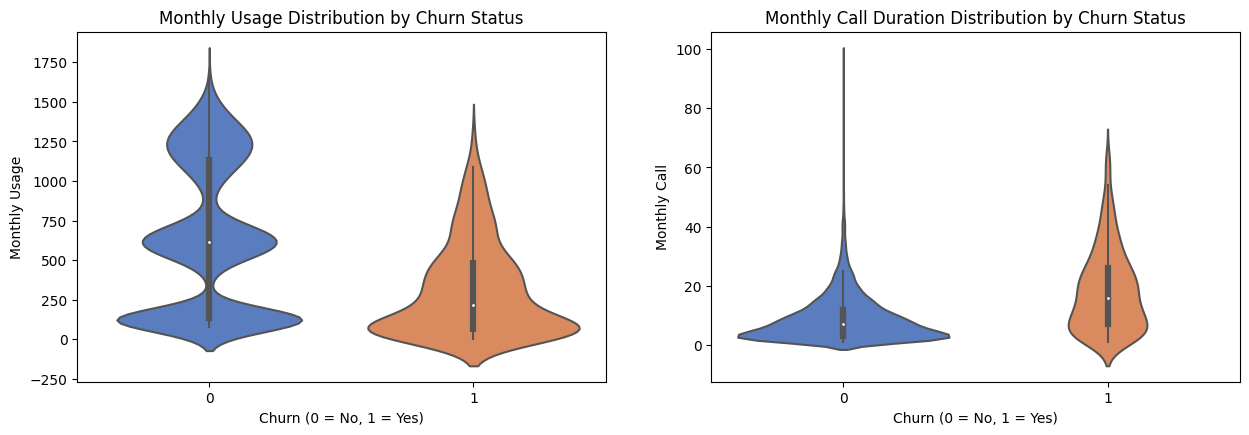

In [7]:
plt.figure(figsize=(15,10))

#Income Distribution by Customer Churn
plt.subplot(2, 2, 1)
sns.violinplot(x=merged_df['churn_in_month'], y=merged_df['total_monthly_usage_gb'], palette="muted")

plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Usage')
plt.title('Monthly Usage Distribution by Churn Status')

#Age Distribution by Customer Churn
plt.subplot(2, 2, 2)
sns.violinplot(x=merged_df['churn_in_month'], y=merged_df['total_monthly_call_duration'], palette="muted")

plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Call')
plt.title('Monthly Call Duration Distribution by Churn Status')

plt.show()

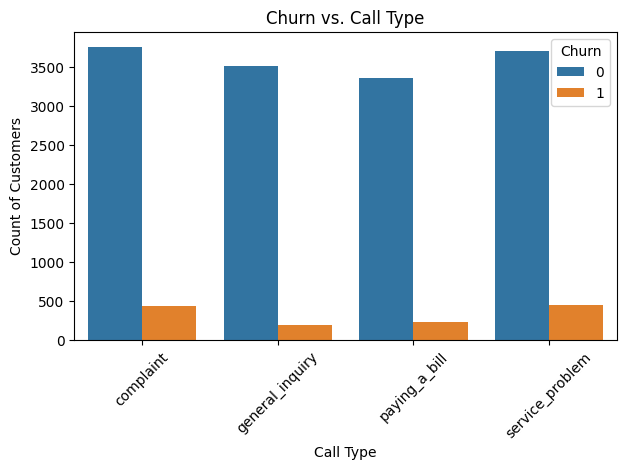

In [8]:
#relation between churn and call types
call_churn_counts = merged_df2.groupby(["call_type", "churn_in_month"]).size().reset_index(name="count")

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(x="call_type", y="count", hue="churn_in_month", data=call_churn_counts)
plt.xlabel("Call Type")
plt.ylabel("Count of Customers")
plt.title("Churn vs. Call Type")
plt.xticks(rotation=45)
plt.legend(title="Churn")
plt.show()

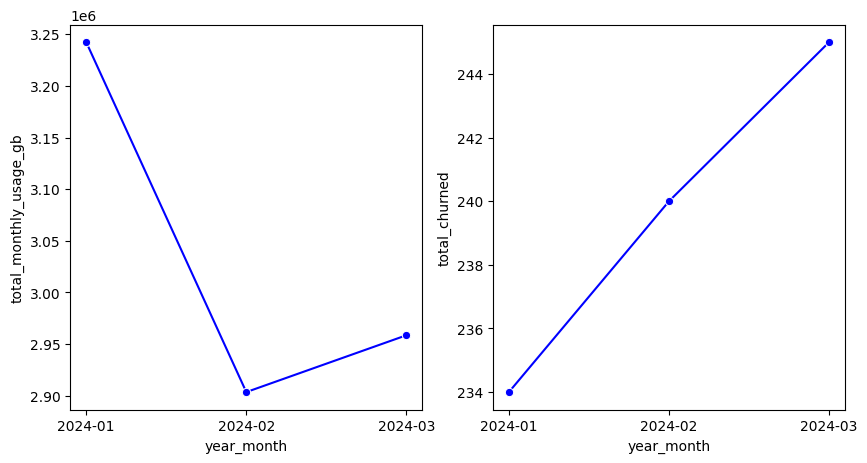

In [9]:
plt.figure(figsize=(10,5))


#Monthly data usage by customer extraction
monthly_usage_query = """SELECT customer_id, 
    strftime('%Y-%m', usage_date) AS year_month,
    SUM(data_in_gb + data_out_gb) AS total_monthly_usage_gb
FROM usage
GROUP BY year_month
ORDER BY year_month;"""
monthly_usage_df = pd.read_sql(monthly_usage_query, conn)
#display(monthly_usage_df)
plt.subplot(1, 2, 1)
sns.lineplot(
    data=monthly_usage_df,
    x='year_month',
    y='total_monthly_usage_gb',
    marker='o',
    color='b'
)


#Monthly churn by customer extraction
monthly_user_churn_query = """SELECT customer_id, 
    strftime('%Y-%m', churn_date) AS year_month,
    COUNT(*) AS total_churned
FROM demographics
where churn=1
GROUP BY year_month
ORDER BY year_month;"""
monthly_user_churn_df = pd.read_sql(monthly_user_churn_query, conn)
#display(monthly_user_churn_df)
plt.subplot(1, 2, 2)
sns.lineplot(
    data=monthly_user_churn_df,
    x='year_month',
    y='total_churned',
    marker='o',
    color='b'
)

plt.show()


#### 5. Things to consider for the follow up interview

Come prepared to discuss some of the following questions. Feel free to jot down some notes/ideas.

1. Based on the data available and your analysis from questions 3 and 4, provide a short recommendation to the business about how you'd use such a model and potential solves.
   - Which segments of customers are most at risk?
   - How might the business intervene?

2. What other data sources could be valuable for an ISP when predicting churn?

3. Based on your analysis above, outline how you would build a basic classification model 
   to predict churn for a given month.
      - Design considerations, pre processing, feature engineering, metrics etc

You **should not** provide code for a complete model training pipeline.


# Customers most at risk
Low-income customers
Older customers
High call volume to customer support
**Heavy data users on low-speed plans

# Recommendations: 
churn prediction model monthly to proactively identify at-risk customers
offer personalized discounts for high-risk customers
Royalty programs for long-term customers.
customized plan recommendations based on data usage

# Other data sources
common support complaints from chat/call logs (outage, speed)
competitor providers and their plans
access previous users and gain switching reason


#### building a model considerations

# Design Considerations
Binary Classification Problem
Class Imbalance (over/under sample, stratified cross validation, weihgted loss function, appropriate models (xgboost))
customer behavior over time


# Data Preprocessing
drop/fill missing values
encode categorical features (ordinal/non-ordinal/date-related)
scaling numerical features

# Feature engineering
Total monthly usage
current plan/promotion
number of calls related to complaints
churn history
membership length
define a score for each user

# Model Selection
Logistic Regression (for interpretability)
XGBoost (Handles missing values, unbalanced data, feature importance)
Random Forest (Handles missing values, reduces overfitting)

# Model Training & Evaluation
imbalance data: over/under sampling, using stratified CV
Train/Validation/Test split
focus on recall if missing churn cases is costly
focus on precision if false churn cases is costly
focus on F1-score if balance of the above measures is important




